In [7]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/hpc-rosneft/drigo/surrogate/src/')
import glob
import numpy as np
from tqdm import tqdm
import pandas as pd

# plotting settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 1200
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error as mse

from feature_table import FeatureTable
from dataset import load_features, load
import cfg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
def clean_data(X, y):
    m = np.column_stack([y, X])
    m = m[~np.isnan(m).any(axis=1)]
    return m[:,0], m[:,1:]

def regress(X, y, X_test, y_test):
    reg = Lasso(alpha=0.1,max_iter=10000)
    y_c, X_c = clean_data(X, y)
    reg.fit(X=X_c, y=y_c)
    
    mask = ~np.isnan(X_test).any(axis=1)
    pred = reg.predict(X_test[mask])
    #idx = np.argwhere(mask).ravel()
    
    pred_out = np.empty_like(y_test)
    pred_out[mask] = pred
    pred_out[~mask] = np.nan
    pred_out[pred_out<0] = 0
    y_pred_c, y_test_c = clean_data(pred_out, y_test)
    mse_val = np.sqrt(mse(y_pred=y_pred_c, y_true=y_test_c)) # actually it is RMSE value
    return mse_val, pred_out

def load_nemo_data(years):
    model_data = []
    for year in years:
        d = load(year=year, variable='icethic_cea')
        model_data.append(d[:, point[0], point[1]])
    model_data=np.concatenate([*model_data])
    return model_data

In [28]:
def plotting(pred, y_test, model_data, mse_val, years_test):
    plt.plot(pred, label='Predictions')
    plt.plot(y_test, label='Measurements')
    plt.plot(model_data, label = 'NEMO')
    plt.axhline(y=0, color='grey', linestyle='-')
    plt.xlabel('Days since 1 Jan {}'.format(years_test[0]))
    plt.ylabel('Sea ice thickness (m)')
    plt.legend()
    
    plt.title('Sea ice thickness (m), years {}'.format(''.join((str(e)+' ' for e in years_test))))
    plt.text(s='RMSE={}'.format(round(mse_val, 2)),x=0, y=0.01, size=15)

# Linear regression 1 point


## 1
- **Years train**: 2010-2013
- **Years test** : 2014-2015
- **X train**: sat ice concentration, 2m air temperature
- **y test** : sat ice thickness
- **dx** : 2
- **dy** : 2
- **dt** : 0

In [29]:
years_train = list(range(2010,2014))
years_test = [2014, 2015]
X_vars = ['ice_conc', 'tair']
y_var = 'Thickness'
point = (109, 203) # approximately 80N 80E Kara Sea
ft = FeatureTable(dx=2, dy=2, dt=2)

y, X = load_features(X_vars=X_vars,
                     y_var=y_var,
                     years=years_train,
                     point=point,
                     feature_table=ft,
                    autoreg=False)

y_test, X_test = load_features(X_vars=X_vars,
                               y_var=y_var,
                               years=years_test,
                               point=point,
                               feature_table=ft,
                              autoreg=False)

Loading ice_conc
Loading tair
Loading Thickness
Total features 2, X size (1461, 250)
Loading ice_conc
Loading tair
Loading Thickness
Total features 2, X size (730, 250)


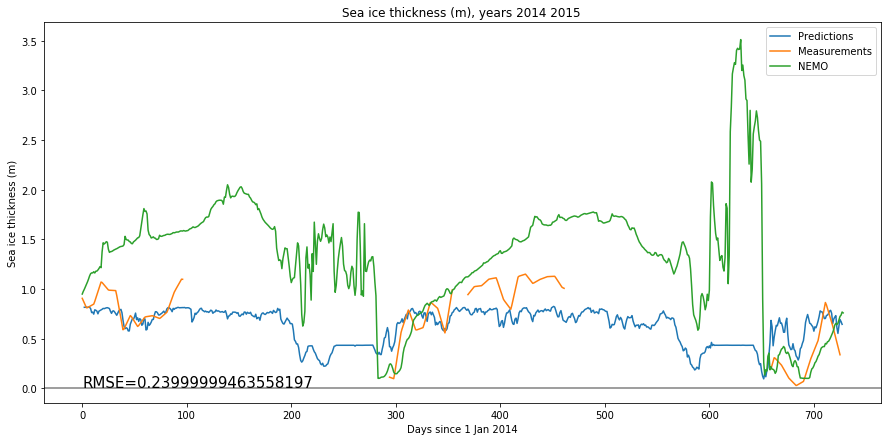

In [38]:
mse_val, pred = regress(X, y, X_test, y_test)
model_data = load_nemo_data(years_test)
plotting(pred, y_test, model_data, mse_val, years_test)

## 2
- **Years train**: 2010-2013
- **Years test** : 2014-2015
- **X train**: sat ice concentration, 2m air temperature
- **y test** : sat ice thickness
- **dx** : 10
- **dy** : 10
- **dt** : 0

Loading ice_conc
Loading tair
Loading Thickness
Total features 2, X size (1461, 882)
Loading ice_conc
Loading tair
Loading Thickness
Total features 2, X size (730, 882)


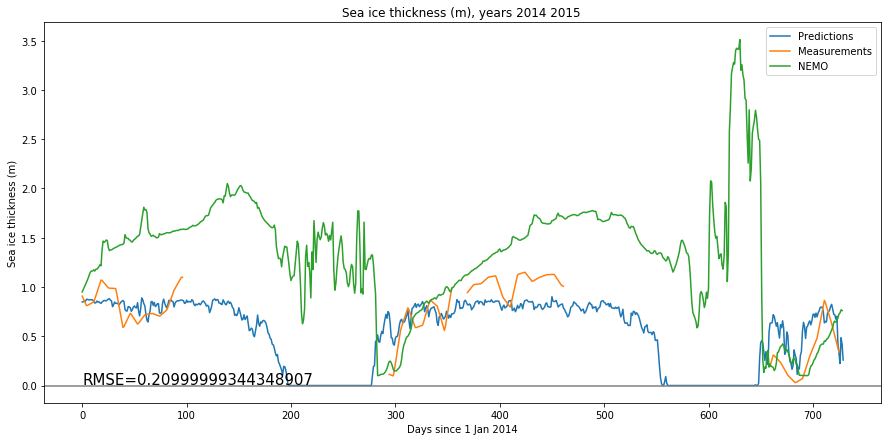

In [44]:
years_train = list(range(2010,2014))
years_test = [2014, 2015]
X_vars = ['ice_conc', 'tair']
y_var = 'Thickness'
point = (109, 203) # approximately 80N 80E Kara Sea
ft = FeatureTable(dx=10, dy=10, dt=0)

y, X = load_features(X_vars=X_vars,
                     y_var=y_var,
                     years=years_train,
                     point=point,
                     feature_table=ft)

y_test, X_test = load_features(X_vars=X_vars,
                               y_var=y_var,
                               years=years_test,
                               point=point,
                               feature_table=ft)
model_data = load_nemo_data(years_test)
mse_val, pred = regress(X, y, X_test, y_test)
plotting(pred, y_test, model_data, mse_val, years_test)

## 3
- **Years train**: 2010-2013
- **Years test** : 2014-2015
- **X train**: sat ice concentration, 2m air temperature
- **y test** : sat ice thickness
- **dx** : 0
- **dy** : 0
- **dt** : 0

Loading ice_conc
Loading tair
Loading Thickness
Total features 2, X size (1461, 2)
Loading ice_conc
Loading tair
Loading Thickness
Total features 2, X size (730, 2)


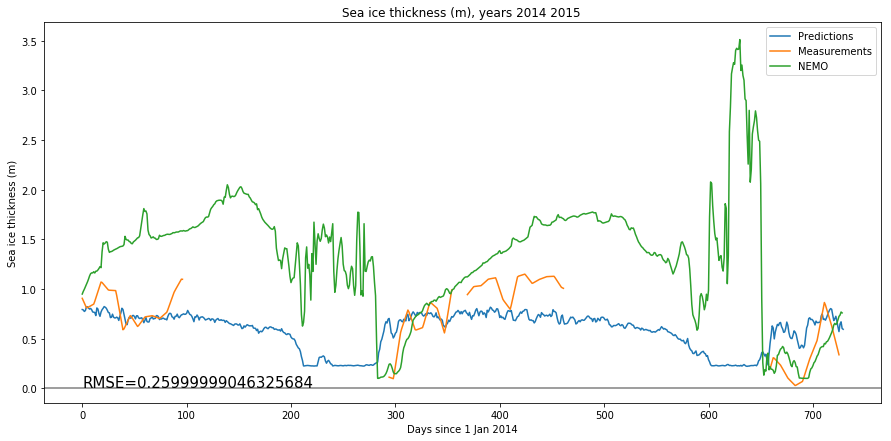

In [41]:
years_train = list(range(2010,2014))
years_test = [2014, 2015]
X_vars = ['ice_conc', 'tair']
y_var = 'Thickness'
point = (109, 203) # approximately 80N 80E Kara Sea
ft = FeatureTable(dx=0, dy=0, dt=0)

y, X = load_features(X_vars=X_vars,
                     y_var=y_var,
                     years=years_train,
                     point=point,
                     feature_table=ft)
y_test, X_test = load_features(X_vars=X_vars,
                               y_var=y_var,
                               years=years_test,
                               point=point,
                               feature_table=ft)
model_data = load_nemo_data(years_test)
mse_val, pred = regress(X, y, X_test, y_test)
plotting(pred, y_test, model_data, mse_val, years_test)

Loading ice_conc
Loading tair
Loading Thickness
Total features 2, X size (1461, 250)
Loading ice_conc
Loading tair
Loading Thickness
Total features 2, X size (365, 250)


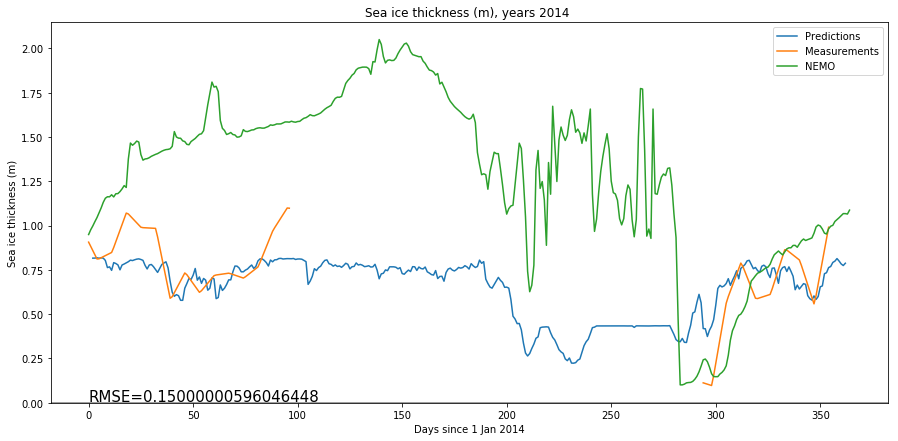

In [42]:
years_train = list(range(2010,2014))
years_test = [2014]
X_vars = ['ice_conc','tair']
y_var = 'Thickness'
point = (109, 203) # approximately 80N 80E Kara Sea
ft = FeatureTable(dx=2, dy=2, dt=2)

y, X = load_features(X_vars=X_vars,
                     y_var=y_var,
                     years=years_train,
                     point=point,
                     feature_table=ft,
                    autoreg=False)

y_test, X_test = load_features(X_vars=X_vars,
                               y_var=y_var,
                               years=years_test,
                               point=point,
                               feature_table=ft,
                               autoreg=False)
model_data = load_nemo_data(years_test)
mse_val, pred = regress(X, y, X_test, y_test)
plotting(pred, y_test, model_data, mse_val, years_test)